In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Read Jinshi data
jinshi_pd = pd.read_excel('input-tang-jinshi-raw.xlsx', sheet_name='Sheet1')
jinshi_pd = jinshi_pd.dropna(subset=['Entry Year'])
jinshi_pd = jinshi_pd[jinshi_pd['Entry Year'] != 0]
print(jinshi_pd.head())

   Entry Year   姓名
0         618  田仁會
1         618  崔仁師
2         621   李詔
3         622  孫伏伽
4         623  李義琛


In [51]:
# Read nianhao dictionary

nianhao_dic = {}
nianhao_pd = pd.read_excel('dic-tang-nianhao.xlsx', sheet_name='data')
for index, row in nianhao_pd.iterrows():
    nianhao_dic[row['reign_complete']] = row['year']
# print(list(nianhao_dic.items())[:5])

In [52]:
# Read millitary commisson assistants' 文職僚佐 data

mca_pd = pd.read_excel('input-tang-mca.xlsx', sheet_name='Sheet1')
# drop the records when 僚佐名字 is null
mca_pd = mca_pd.dropna(subset=['僚佐名字'])
mca_pd = mca_pd.dropna(subset=['节镇在任时间'])
mca_pd["year_chn"] = mca_pd["节镇在任时间"].str.split("——", n = 1, expand = True)[0]
mca_pd["year"] = mca_pd["year_chn"].map(nianhao_dic)
print(mca_pd.head())

  节镇名  节度使      节镇在任时间 僚佐名字 year_chn   year
0  鳳翔  崔光遠        上元元年   嚴侁     上元元年  760.0
1  鳳翔  崔光遠        上元元年   高某     上元元年  760.0
2  鳳翔   高昇  上元二年——廣德元年   李某     上元二年  761.0
3  鳳翔   高昇  上元二年——廣德元年   趙某     上元二年  761.0
4  鳳翔   高昇  上元二年——廣德元年   于邵     上元二年  761.0


In [53]:
# Read 氏族志 data （Hunhuang manuscript）
# https://zh.wikipedia.org/zh-hans/%E6%B0%8F%E6%97%8F%E5%BF%97

shizuzhi_list = []
with open('dic-shizuzhi.txt', 'r', encoding='utf-8') as f:
    for line in f:
        shizuzhi_list.append(line.strip())
print(shizuzhi_list[:5])

['璩', '桑', '李', '眭', '扈']


In [54]:
# Matching the name of jinshi with the name of shizuzhi

jinshi_shizuzhi_pd = pd.DataFrame(columns=jinshi_pd.columns)
for index, row in jinshi_pd.iterrows():
    if row['姓名'][:2] in shizuzhi_list:
        jinshi_shizuzhi_pd = jinshi_shizuzhi_pd.append(row, ignore_index=True)
        continue
    if row['姓名'][:1] in shizuzhi_list:
        jinshi_shizuzhi_pd = jinshi_shizuzhi_pd.append(row, ignore_index=True)
print(jinshi_shizuzhi_pd.head())

  Entry Year   姓名
0        618  崔仁師
1        621   李詔
2        622  孫伏伽
3        623  李義琛
4        623  李義琰


In [55]:
# Matching the name of mca with the name of shizuzhi

mca_shizuzhi_pd = pd.DataFrame(columns=mca_pd.columns)
for index, row in mca_pd.iterrows():
    if row['僚佐名字'][:2] in shizuzhi_list:
        mca_shizuzhi_pd = mca_shizuzhi_pd.append(row, ignore_index=True)
        continue
    if row['僚佐名字'][:1] in shizuzhi_list:
        mca_shizuzhi_pd = mca_shizuzhi_pd.append(row, ignore_index=True)

In [56]:
# Set group configuration

group_num = 20
year_begin = 0
# year_begin = 680
year_end = 880

In [57]:
# Create groups for jinshi data

jinshi_pd['Entry Year'] = jinshi_pd['Entry Year'].astype(int)
jinshi_shizuzhi_pd['Entry Year'] = jinshi_shizuzhi_pd['Entry Year'].astype(int)
jinshi_pd_groupby = jinshi_pd.groupby(jinshi_pd['Entry Year'] // group_num * group_num).size().to_dict()
print(jinshi_pd_groupby)
jinshi_shizuzhi_pd_groupby = jinshi_shizuzhi_pd.groupby(jinshi_shizuzhi_pd['Entry Year'] // group_num * group_num).size().to_dict()
print(jinshi_shizuzhi_pd_groupby)

{600: 2, 620: 34, 640: 67, 660: 96, 680: 131, 700: 189, 720: 170, 740: 153, 760: 150, 780: 352, 800: 248, 820: 269, 840: 192, 860: 154, 880: 142, 900: 89, 920: 74, 940: 78}
{600: 1, 620: 27, 640: 47, 660: 76, 680: 92, 700: 142, 720: 125, 740: 109, 760: 112, 780: 249, 800: 190, 820: 204, 840: 155, 860: 112, 880: 102, 900: 63, 920: 58, 940: 56}


In [58]:
# Create groups for mca data

mca_pd_groupby = mca_pd.groupby(mca_pd['year'] // group_num * group_num).size().to_dict()
print(mca_pd_groupby)
mca_shizuzhi_pd_groupby = mca_shizuzhi_pd.groupby(mca_shizuzhi_pd['year'] // group_num * group_num).size().to_dict()
print(mca_shizuzhi_pd_groupby)

{700.0: 8, 720.0: 47, 740.0: 37, 760.0: 179, 780.0: 259, 800.0: 230, 820.0: 221, 840.0: 138, 860.0: 103, 880.0: 110, 900.0: 10}
{700.0: 7, 720.0: 33, 740.0: 29, 760.0: 123, 780.0: 202, 800.0: 177, 820.0: 187, 840.0: 106, 860.0: 84, 880.0: 87, 900.0: 9}


In [59]:
# Create the dictionary for the ratio of shizuzhi in jinshi and mca

jinshi_year_ratio_dic = {}
for key in jinshi_pd_groupby.keys():
    if year_begin != 0:
        if key < year_begin or key > year_end:
            continue
    if key in jinshi_shizuzhi_pd_groupby.keys():
        jinshi_year_ratio_dic[key] = jinshi_shizuzhi_pd_groupby[key] / jinshi_pd_groupby[key]
    else:
        jinshi_year_ratio_dic[key] = 0

mca_year_ratio_dic = {}
for key in mca_pd_groupby.keys():
    if year_begin != 0:
        if key < year_begin or key > year_end:
            continue
    if key in mca_shizuzhi_pd_groupby.keys():
        mca_year_ratio_dic[key] = mca_shizuzhi_pd_groupby[key] / mca_pd_groupby[key]
    else:
        mca_year_ratio_dic[key] = 0

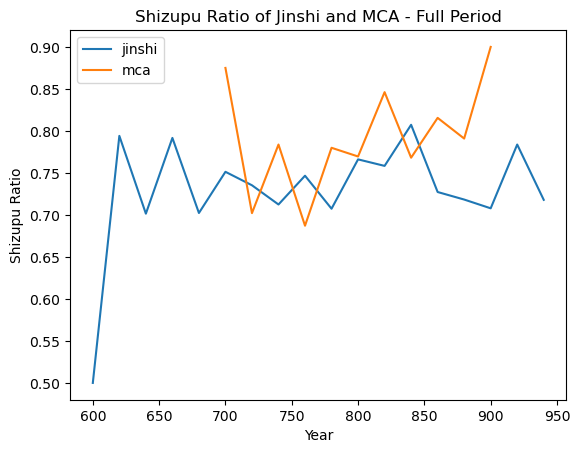

In [60]:
# Draw jinshi_year_ratio_dic and mca_year_ratio_dic on the same chart

plt.plot(list(jinshi_year_ratio_dic.keys()), list(jinshi_year_ratio_dic.values()), label='jinshi')
plt.plot(list(mca_year_ratio_dic.keys()), list(mca_year_ratio_dic.values()), label='mca')
plt.xlabel('Year')
plt.ylabel('Shizupu Ratio')
plt.title('Shizupu Ratio of Jinshi and MCA - Full Period')
plt.legend()
plt.savefig('jinshi_mca.png')
plt.show()

In [61]:
# Remove the keys in jinshi_year_ratio_dic and mca_year_ratio_dic when the other one doesn't have

for key in list(jinshi_year_ratio_dic.keys()):
    if key not in mca_year_ratio_dic.keys():
        jinshi_year_ratio_dic.pop(key)
for key in list(mca_year_ratio_dic.keys()):
    if key not in jinshi_year_ratio_dic.keys():
        mca_year_ratio_dic.pop(key)

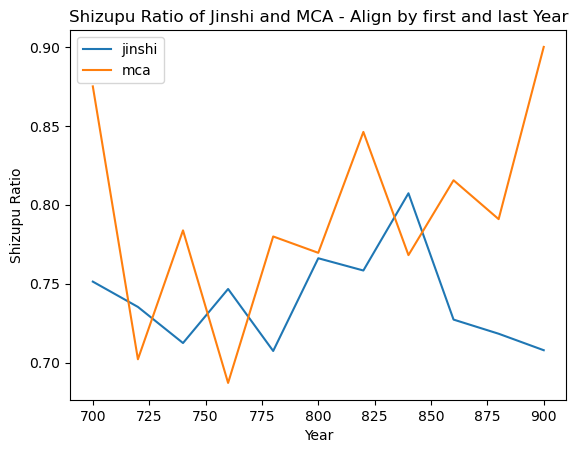

In [62]:
# Draw jinshi_year_ratio_dic and mca_year_ratio_dic on the same chart, skip the year either of them is 0

plt.plot(list(jinshi_year_ratio_dic.keys()), list(jinshi_year_ratio_dic.values()), label='jinshi')
plt.plot(list(mca_year_ratio_dic.keys()), list(mca_year_ratio_dic.values()), label='mca')
plt.xlabel('Year')
plt.ylabel('Shizupu Ratio')
plt.title('Shizupu Ratio of Jinshi and MCA - Align by first and last Year')
plt.legend()
plt.savefig('jinshi_mca.png')
plt.show()

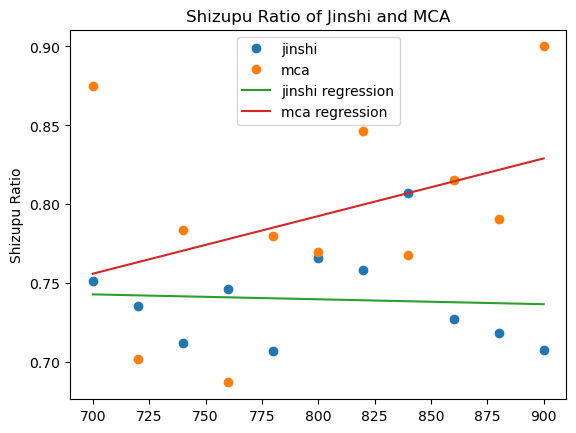

In [72]:
# Calculate regression line for jinshi and mca

plt.plot(list(jinshi_year_ratio_dic.keys()), list(jinshi_year_ratio_dic.values()), 'o', label='jinshi')
plt.plot(list(mca_year_ratio_dic.keys()), list(mca_year_ratio_dic.values()), 'o', label='mca')

# Calculate regression line for jinshi_year_ratio_dic
x_jinshi = np.array(list(jinshi_year_ratio_dic.keys()))
y_jinshi = np.array(list(jinshi_year_ratio_dic.values()))
m_jinshi, b_jinshi = np.polyfit(x_jinshi, y_jinshi, 1)
plt.plot(x_jinshi, m_jinshi*x_jinshi + b_jinshi, '-', label='jinshi regression')

# Calculate regression line for mca_year_ratio_dic
x_mca = np.array(list(mca_year_ratio_dic.keys()))
y_mca = np.array(list(mca_year_ratio_dic.values()))
m_mca, b_mca = np.polyfit(x_mca, y_mca, 1)
plt.plot(x_mca, m_mca*x_mca + b_mca, '-', label='mca regression')

# Draw regression line
plt.ylabel('Shizupu Ratio')
plt.title('Shizupu Ratio of Jinshi and MCA')

plt.legend()
plt.savefig('jinshi_mca_regression.png')
plt.show()
